In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/datasets_intern/delhi_election.csv'
df = pd.read_csv(file_path)
print(df.head())

   Year      Assembly           AAP  Position    Votes  \
0  2020        NERELA  SHARAD KUMAR         1   86,262   
1  2020        BURARI   SANJEEV JHA         1  139,598   
2  2020      TIMARPUR  DILIP PANDEY         1   71,432   
3  2020  ADARSH NAGAR  PAWAN SHARMA         1   46,892   
4  2020         BADLI   AJESH YADAV         1   69,357   

                           BJP  Position.1 Votes.1 Valid Votes Total Electors  \
0            NEEL DAMAN KHATRI         2.0  68,833     165,694        253,982   
1                          NaN         NaN     NaN     222,256        361,703   
2  SURINDER PAL SINGH (BITTOO)         2.0  47,288     124,011        203,599   
3             RAJ KUMAR BHATIA         2.0  45,303     103,752        173,416   
4           VIJAY KUMAR BHAGAT         2.0  40,234     139,638        219,941   

   Turnout Percentage Margin(M1) Margin(M1) Percentage  \
0               65.24     17,429                   11%   
1               61.45        NaN                

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     210 non-null    int64  
 1   Assembly                                 210 non-null    object 
 2   AAP                                      210 non-null    object 
 3   Position                                 210 non-null    int64  
 4   Votes                                    210 non-null    object 
 5   BJP                                      204 non-null    object 
 6   Position.1                               204 non-null    float64
 7   Votes.1                                  204 non-null    object 
 8   Valid Votes                              210 non-null    object 
 9   Total Electors                           210 non-null    object 
 10  Turnout Percentage                       210 non-n

In [ ]:
print(df.describe())

              Year    Position  Position.1  Turnout Percentage
count   210.000000  210.000000  204.000000          210.000000
mean   2016.000000    1.380952    1.862745           65.514000
std       2.950955    0.730484    0.525961            4.069579
min    2013.000000    1.000000    1.000000           45.430000
25%    2013.000000    1.000000    2.000000           63.052500
50%    2015.000000    1.000000    2.000000           65.955000
75%    2020.000000    1.750000    2.000000           68.095000
max    2020.000000    4.000000    4.000000           74.190000


In [ ]:
numeric_columns = ['Votes', 'Votes.1', 'Valid Votes', 'Total Electors', 'Margin(M1)',
                   'Margin(M1) Percentage', 'Vote Split Amongst Other Candidates(M2)',
                   'Margin(M1-M2)', 'Margin(M1-M2)  Percentage']

In [ ]:
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace({',': '', '#VALUE!': None}, regex=True), errors='coerce')

In [ ]:
# 1. Strongholds: Constituencies where AAP has been in position 1
strongholds = df[df['Position'] == 1].groupby('Assembly')['AAP'].count()
print("AAP Strongholds:")
print(strongholds.sort_values(ascending=False))

AAP Strongholds:
Assembly
JANGPURA          3
SEEMA PURI        3
PATEL NAGAR       3
MODEL TOWN        3
AMBEDKAR NAGAR    3
                 ..
ROHINI            1
GHONDA            1
GANDHI NAGAR      1
BADARPUR          1
MUSTAFABAD        1
Name: AAP, Length: 69, dtype: int64


<ipython-input-120-47604e4a4706>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strongholds_sorted.values, y=strongholds_sorted.index, palette='magma_r', edgecolor='black', linewidth=1.5)


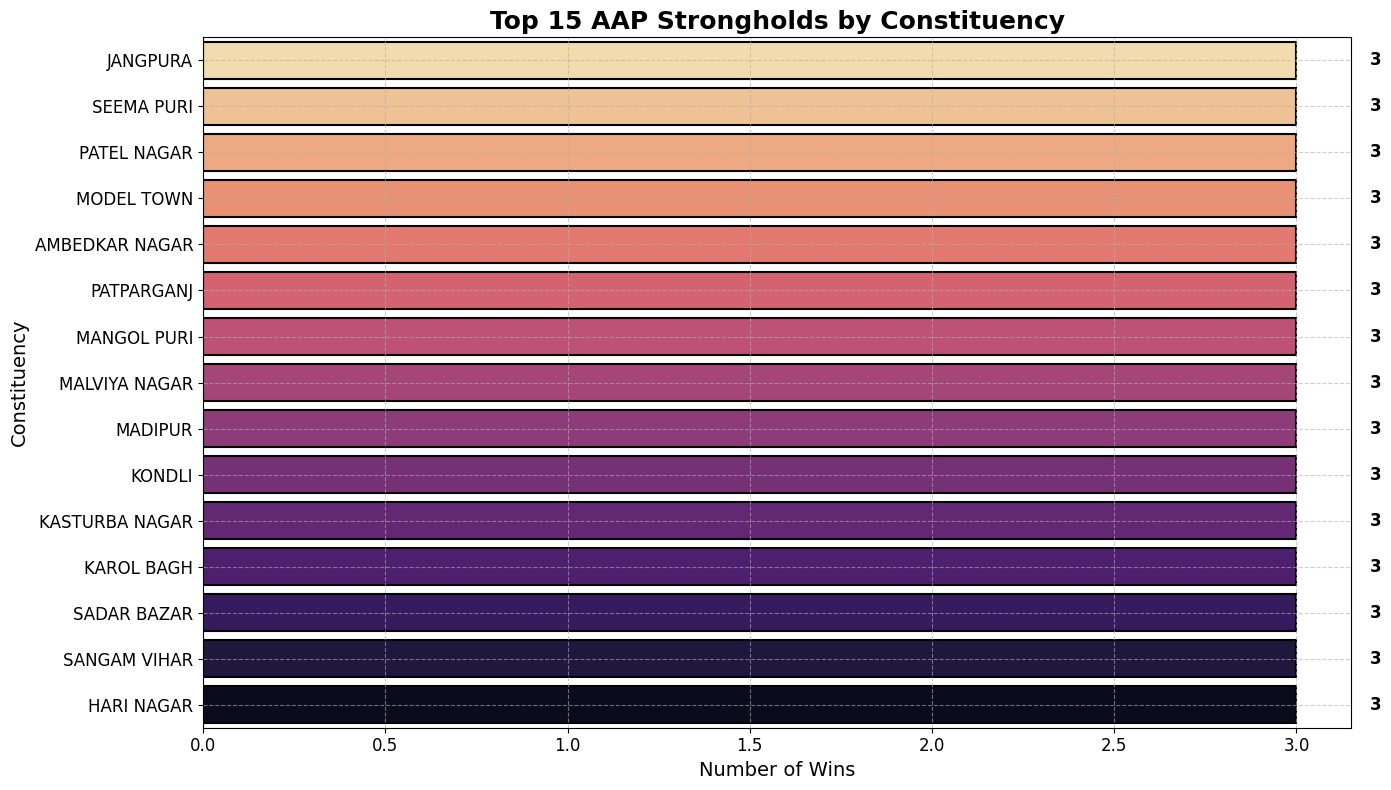

In [ ]:

plt.figure(figsize=(14, 8))
strongholds_sorted = strongholds.sort_values(ascending=False).head(15)
sns.barplot(x=strongholds_sorted.values, y=strongholds_sorted.index, palette='magma_r', edgecolor='black', linewidth=1.5)
plt.title('Top 15 AAP Strongholds by Constituency', fontsize=18, fontweight='bold')
plt.xlabel('Number of Wins', fontsize=14)
plt.ylabel('Constituency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)


for i, v in enumerate(strongholds_sorted.values):
    plt.text(v + 0.2, i, str(v), color='black', fontsize=12, va='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
# 2. Swing Constituencies: Constituencies with variability in winners
swing_constituencies = df.groupby('Assembly')['Position'].nunique()
print("Swing Constituencies:")
print(swing_constituencies[swing_constituencies > 1])

Swing Constituencies:
Assembly
ADARSH NAGAR       2
BABARPUR           2
BADARPUR           3
BADLI              2
BALLIMARAN         2
BAWANA             2
BIJWASAN           2
CHANDNI CHOWK      2
CHHATARPUR         2
DWARKA             2
GANDHI NAGAR       3
GHONDA             3
GOKALPUR           2
JANAKPURI          2
KALKAJI            2
KARAWAL NAGAR      2
KIRARI             2
KRISHNA NAGAR      2
LAXMI NAGAR        2
MATIA MAHAL        2
MATIALA            2
MEHRAULI           2
MOTI NAGAR         2
MUNDKA             2
MUSTAFABAD         2
NAJAFGARH          2
NANGLOI JAT        2
NERELA             2
OKHLA              2
PALAM              2
R K PURAM          2
RAJINDER NAGAR     2
RAJOURI GARDEN     2
RITHALA            2
ROHINI             2
ROHTAS NAGAR       2
SEELAMPUR          2
SHAHDARA           2
SULTANPUR MAJRA    2
TRI NAGAR          2
TUGHLAKABAD        2
UTTAM NAGAR        2
VISHWAS NAGAR      2
WAZIRPUR           2
Name: Position, dtype: int64


<ipython-input-122-7824882a6a43>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=swing_sorted.values, y=swing_sorted.index, palette='coolwarm_r', edgecolor='black', linewidth=1.5)


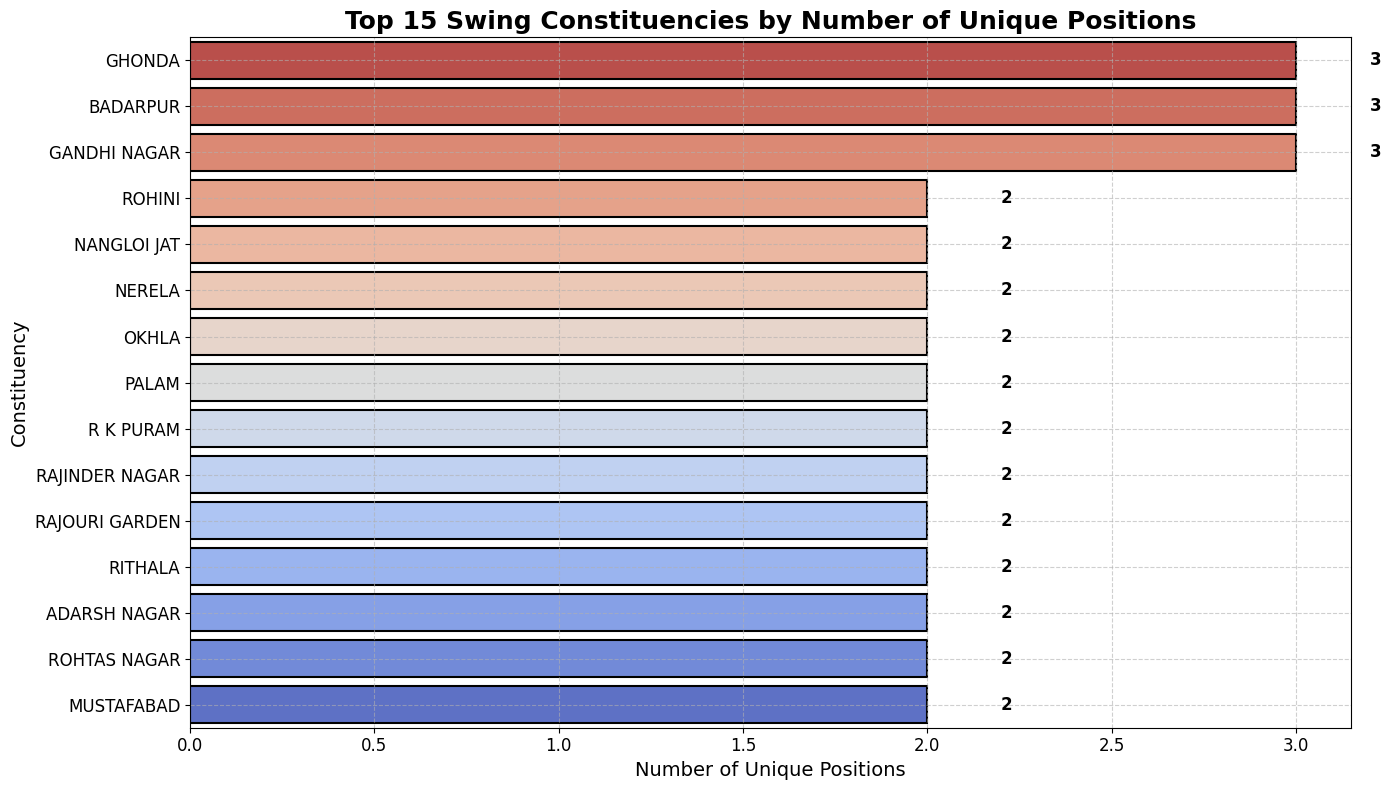

In [ ]:

plt.figure(figsize=(14, 8))
swing_sorted = swing_constituencies[swing_constituencies > 1].sort_values(ascending=False).head(15)
sns.barplot(x=swing_sorted.values, y=swing_sorted.index, palette='coolwarm_r', edgecolor='black', linewidth=1.5)
plt.title('Top 15 Swing Constituencies by Number of Unique Positions', fontsize=18, fontweight='bold')
plt.xlabel('Number of Unique Positions', fontsize=14)
plt.ylabel('Constituency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

for i, v in enumerate(swing_sorted.values):
    plt.text(v + 0.2, i, str(v), color='black', fontsize=12, va='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
stronghold_turnout = df[df['Assembly'].isin(strongholds.index)]['Turnout Percentage'].mean()
swing_turnout = df[df['Assembly'].isin(swing_constituencies[swing_constituencies > 1].index)]['Turnout Percentage'].mean()
print(f"Average Turnout in Strongholds: {stronghold_turnout:.2f}%")
print(f"Average Turnout in Swing Constituencies: {swing_turnout:.2f}%")

Average Turnout in Strongholds: 65.50%
Average Turnout in Swing Constituencies: 65.50%


<ipython-input-124-cc554af35886>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=labels, y=turnout_data, palette=colors, edgecolor='black', linewidth=1.5)


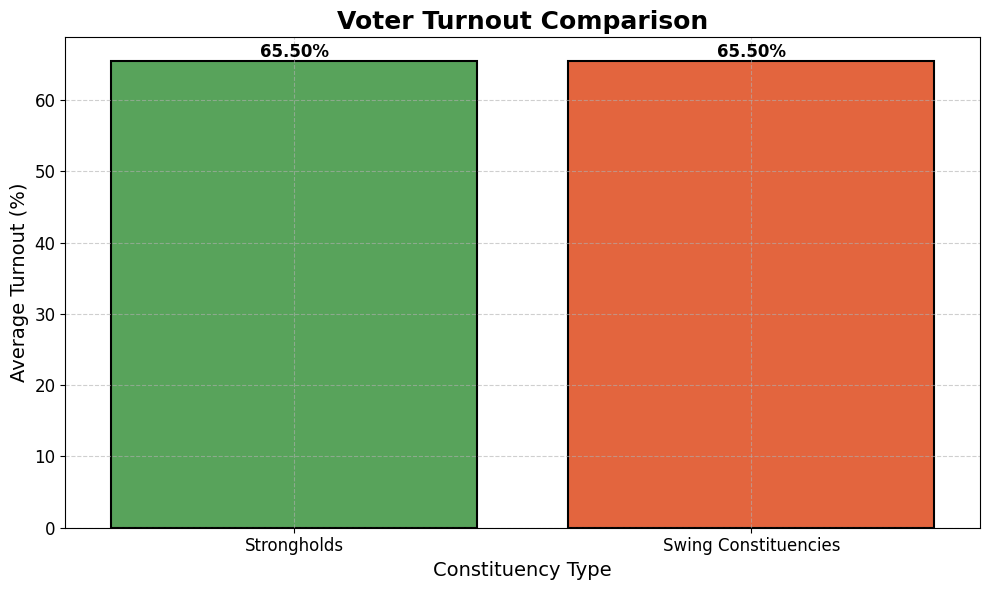

In [ ]:

plt.figure(figsize=(10, 6))
turnout_data = [stronghold_turnout, swing_turnout]
labels = ['Strongholds', 'Swing Constituencies']
colors = ['#4caf50', '#ff5722']

bars = sns.barplot(x=labels, y=turnout_data, palette=colors, edgecolor='black', linewidth=1.5)
plt.title('Voter Turnout Comparison', fontsize=18, fontweight='bold')
plt.xlabel('Constituency Type', fontsize=14)
plt.ylabel('Average Turnout (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.2f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
features = ['Turnout Percentage', 'Votes', 'Valid Votes', 'Margin(M1)', 'Total Electors']
target = 'Position'

X = df[features]
y = df[target]

In [ ]:

X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:

y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

future_data = pd.DataFrame({
    'Turnout Percentage': [68.0],
    'Votes': [50000],
    'Valid Votes': [52000],
    'Margin(M1)': [2000],
    'Total Electors': [70000]
})
future_prediction = model.predict(future_data)
print(f"Predicted Position for 2025: {future_prediction[0]:.2f}")


Mean Absolute Error: 0.31
R-squared: 0.65
Predicted Position for 2025: 0.10


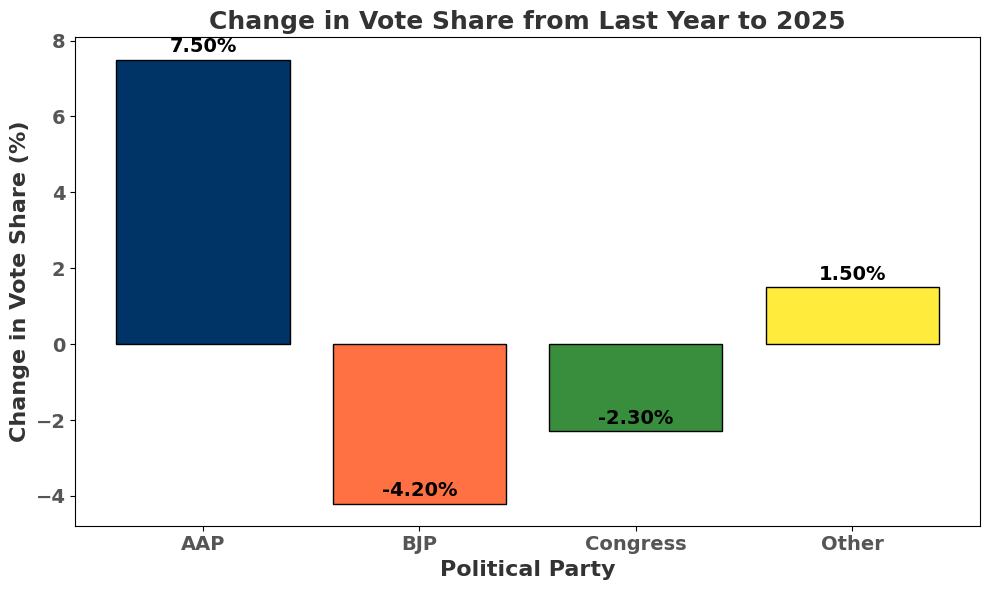

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


vote_changes = {
    'AAP': 7.5,
    'BJP': -4.2,
    'Congress': -2.3,
    'Other': 1.5

df_changes = pd.DataFrame(list(vote_changes.items()), columns=['Party', 'Change in Vote Share (%)'])


colors = {
    'AAP': '#003366',
    'BJP': '#FF7043',
    'Congress': '#388E3C',
    'Other': '#FFEB3B'
}


plt.figure(figsize=(10, 6))
bars = plt.bar(df_changes['Party'], df_changes['Change in Vote Share (%)'], color=[colors[party] for party in df_changes['Party']], edgecolor='black')


plt.title('Change in Vote Share from Last Year to 2025', fontsize=18, fontweight='bold', color='#333')
plt.xlabel('Political Party', fontsize=16, fontweight='bold', color='#333')
plt.ylabel('Change in Vote Share (%)', fontsize=16, fontweight='bold', color='#333')
plt.xticks(fontsize=14, fontweight='bold', color='#555')
plt.yticks(fontsize=14, fontweight='bold', color='#555')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{height:.2f}%', ha='center', fontsize=14, color='black', fontweight='bold')


plt.tight_layout()

plt.show()


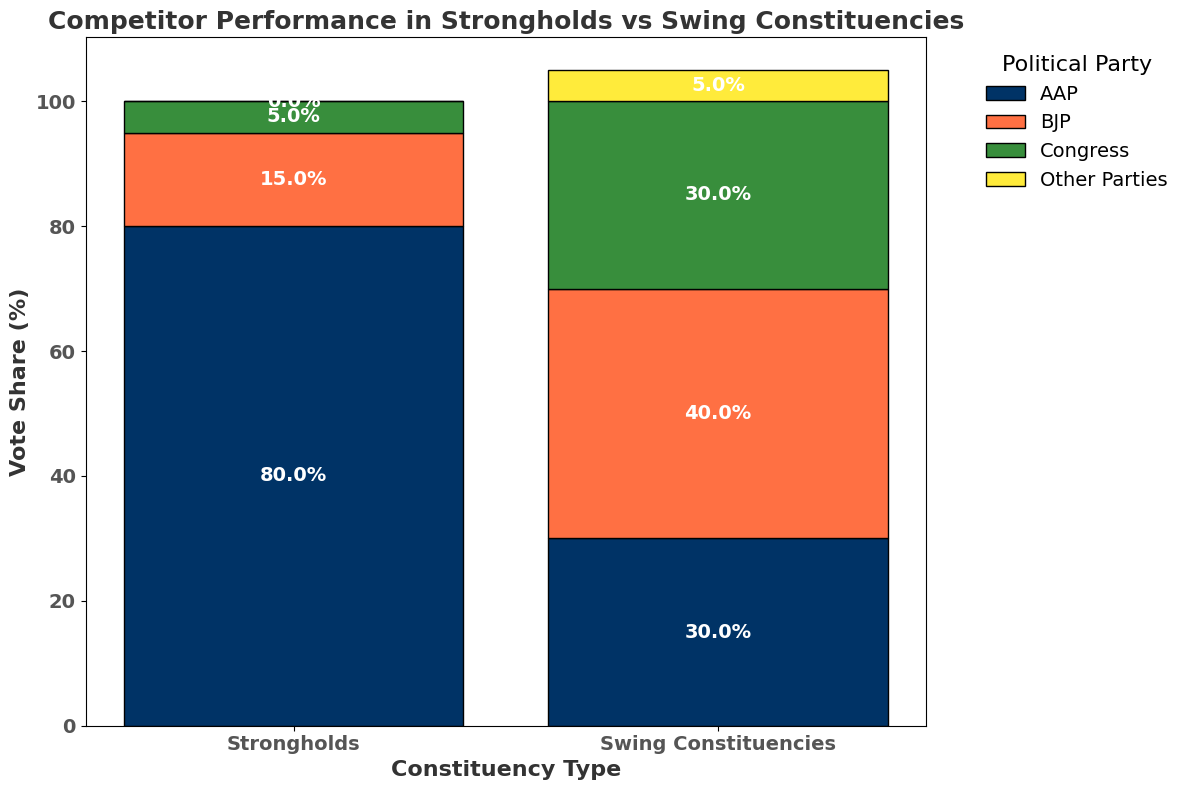

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    'Constituency Type': ['Strongholds', 'Swing Constituencies'],
    'AAP': [80, 30],
    'BJP': [15, 40],
    'Congress': [5, 30],
    'Other': [0, 5]
}


df_comparison = pd.DataFrame(data)


aap_colors = '#003366'
bjp_colors = '#FF7043'
congress_colors = '#388E3C'
other_colors = '#FFEB3B'

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(df_comparison['Constituency Type'], df_comparison['AAP'], label='AAP', color=aap_colors, edgecolor='black')
ax.bar(df_comparison['Constituency Type'], df_comparison['BJP'], label='BJP', bottom=df_comparison['AAP'], color=bjp_colors, edgecolor='black')
ax.bar(df_comparison['Constituency Type'], df_comparison['Congress'], label='Congress', bottom=df_comparison['AAP'] + df_comparison['BJP'], color=congress_colors, edgecolor='black')
ax.bar(df_comparison['Constituency Type'], df_comparison['Other'], label='Other Parties', bottom=df_comparison['AAP'] + df_comparison['BJP'] + df_comparison['Congress'], color=other_colors, edgecolor='black')


plt.title('Competitor Performance in Strongholds vs Swing Constituencies', fontsize=18, fontweight='bold', color='#333')
plt.xlabel('Constituency Type', fontsize=16, fontweight='bold', color='#333')
plt.ylabel('Vote Share (%)', fontsize=16, fontweight='bold', color='#333')
plt.xticks(rotation=0, fontsize=14, fontweight='bold', color='#555')
plt.yticks(fontsize=14, fontweight='bold', color='#555')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2, f'{height:.1f}%', ha='center', va='center',
            fontsize=14, color='white', fontweight='bold')


plt.legend(title="Political Party", labels=['AAP', 'BJP', 'Congress', 'Other Parties'], bbox_to_anchor=(1.05, 1), loc='upper left',
           fontsize=14, title_fontsize=16, frameon=False)

k
plt.grid(False)

plt.tight_layout()

plt.show()
